# Convolutional Neural Network for Fashion-MNIST

## 1 Download and Load Fashion-MNIST Dataset

### 1.1 Download the Dataset

In [23]:
import os
import gzip
import numpy as np
import requests

def download_and_extract(url, filename):
    if not os.path.exists(filename):
        with open(filename, "wb") as f:
            response = requests.get(url)
            f.write(response.content)

base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
files = {
    "train_images": "train-images-idx3-ubyte.gz",
    "train_labels": "train-labels-idx1-ubyte.gz",
    "test_images": "t10k-images-idx3-ubyte.gz",
    "test_labels": "t10k-labels-idx1-ubyte.gz"
}

for key, filename in files.items():
    download_and_extract(base_url + filename, filename)

def extract_images(filename):
    with gzip.open(filename, "rb") as f:
        magic, num, rows, cols = np.frombuffer(f.read(16), dtype=np.uint32, count=4, offset=0).byteswap()
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)
    return data

def extract_labels(filename):
    with gzip.open(filename, "rb") as f:
        magic, num = np.frombuffer(f.read(8), dtype=np.uint32, count=2, offset=0).byteswap()
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data

train_images = extract_images(files["train_images"])
train_labels = extract_labels(files["train_labels"])
test_images = extract_images(files["test_images"])
test_labels = extract_labels(files["test_labels"])

print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### 1.2 Normalize the Data

In [24]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 2 Create CNN Model

### 2.1 Define the Model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(28, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(56, (3, 3), activation='relu'),
    Flatten(),
    Dense(56, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

print("Model summary:")
model.summary()

Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 56)     │        14,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 56)             │       379,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,530 (1.51 MB)

 Trainable params: 394,530 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

## 3 Prepare Data for Training

In [26]:
# Create validation set from the last 12000 samples of the training set
val_images = train_images[-12000:]
val_labels = train_labels[-12000:]
train_images = train_images[:-12000]
train_labels = train_labels[:-12000]

## 4 Train the Model

### 4.1 Define Training Parameters and Train Model

In [27]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7780 - loss: 0.6221 - val_accuracy: 0.8863 - val_loss: 0.3185
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8937 - loss: 0.2914 - val_accuracy: 0.9047 - val_loss: 0.2649
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9140 - loss: 0.2359 - val_accuracy: 0.9078 - val_loss: 0.2555
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9292 - loss: 0.1980 - val_accuracy: 0.9103 - val_loss: 0.2491
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9403 - loss: 0.1654 - val_accuracy: 0.9182 - val_loss: 0.2422
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9477 - loss: 0.1421 - val_accuracy: 0.9193 - val_loss: 0.2410
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9582 - loss: 0.1174 - val_accuracy: 0.9204 - val_loss: 0.2370
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.0987 - 

## 5 Evaluate the Model

### 5.1 Evaluate Training and Validation Accuracy

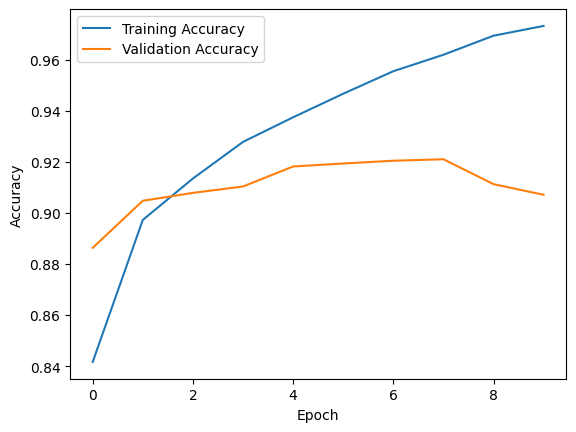

In [28]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 5.2 Evaluate Test Accuracy

In [29]:
# Evaluate accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.3958
Test accuracy: 90.28%


### 5.3 Misscalssified Example

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


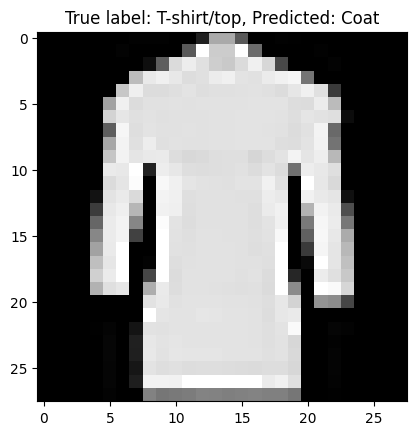

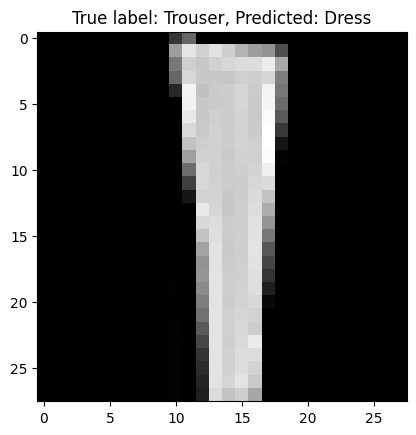

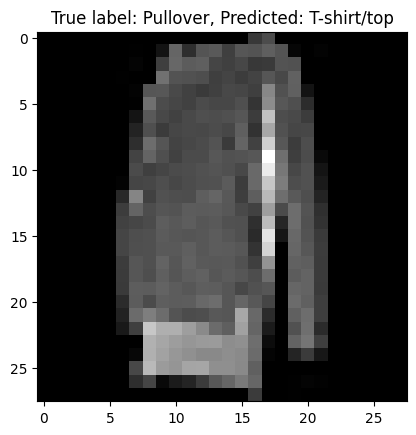

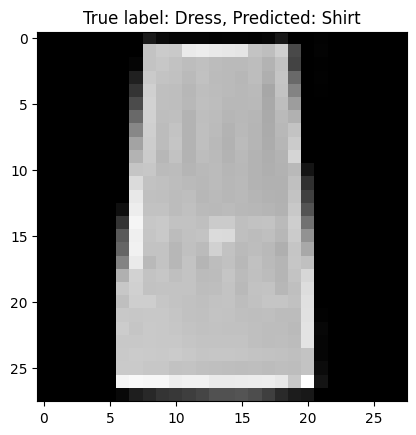

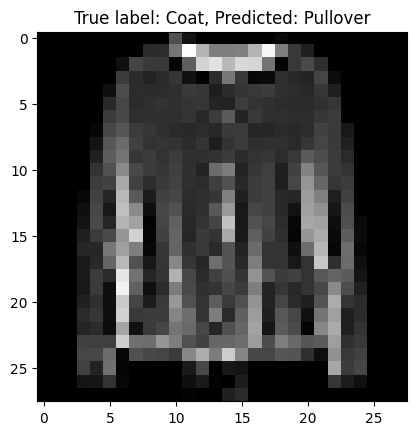

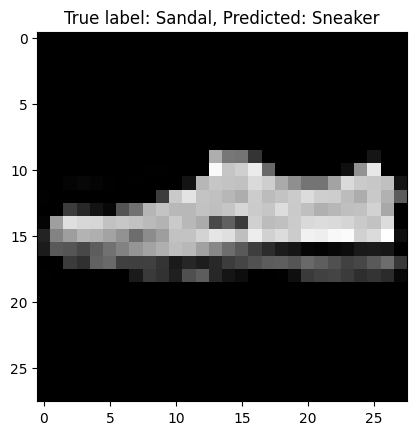

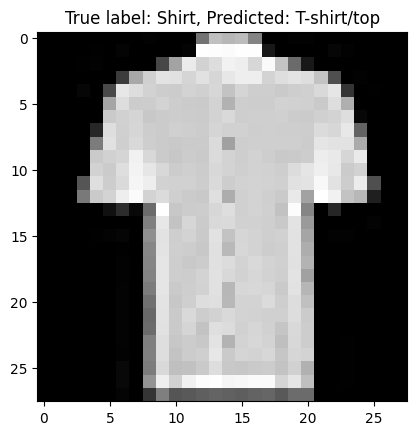

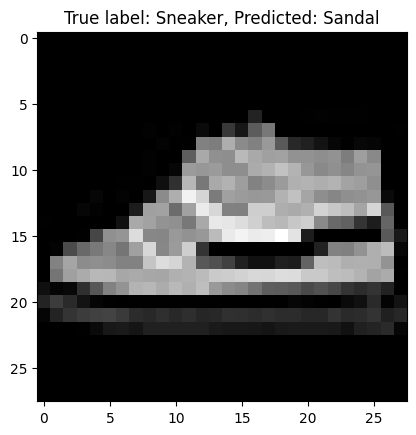

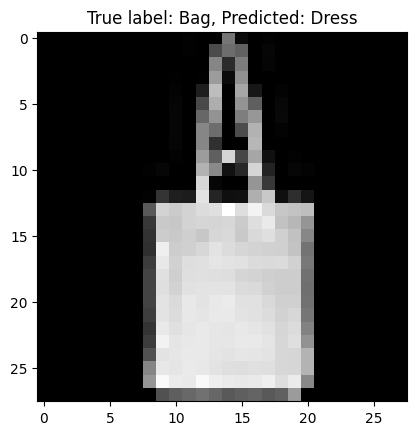

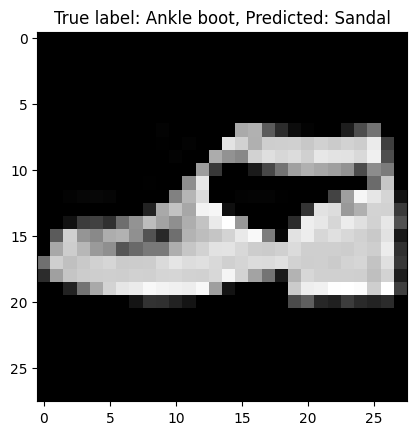

In [30]:
# Predict the labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified examples
misclassified_indices = np.where(predicted_labels != test_labels)[0]

# Show one example of misclassification from each class
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for class_id in range(10):
    for index in misclassified_indices:
        if test_labels[index] == class_id:
            plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
            plt.title(f"True label: {class_names[test_labels[index]]}, Predicted: {class_names[predicted_labels[index]]}")
            plt.show()
            break

## 6. Comment on Observations

### 1. The training accuracy is sligher higher than the validation accuracy, indidciting slight overfitting
### 2. Misclassifications often occur between similar classes like T-Shirt/top and Shirt, as well as the sandel/sneaker
### 3. The Data converged well withen 10 epochs, as seen from the accuracy plots.